<a href="https://colab.research.google.com/github/dave0629g/scikit_learn_datasets/blob/main/regression_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
from sklearn.datasets import load_diabetes
load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59



*   age: age in years 年齡
*   sex: 性別
*   bmi: body mass index 身體質量指數
*   bp: average blood pressure 平均血壓
*   s1: tc, total serum cholesterol 血清總膽固醇
*   s2: ldl, low-density lipoproteins 低密度脂蛋白
*   s3: hdl, high-density lipoproteins 高密度脂蛋白
*   s4: tch, total cholesterol / HDL 總膽固醇/高密度脂蛋白
*   s5: ltg, possibly log of serum triglycerides level 三酸甘油酯指數對數
*   s6: glu, blood sugar level 血糖水平的測量值(HbA1c的百分比數值)



正常三酸甘油脂標準是多少？
只要隔夜禁食，或空腹 8至12小時，就能知道三酸甘油酯數值是否正常。這個檢測通常會跟膽固醇一起進行，以下是三酸甘油酯判斷標準：

理想值：40-149 mg/dl

臨界值：150-199 mg/dl

危險值：200-499 mg/dl

高危險值：500 mg/dl

空腹血糖（fasting blood glucose）濃度是通用的體內葡萄糖平衡的指示，標準值為700-1100毫克/升（70-110 mg/dl）。

原始資料：
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

# 從[https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt) 讀入原始資料，並轉成DataFrame

In [188]:
import pandas as pd
from urllib.request import urlretrieve
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
urlretrieve(url,"diabetes.txt")
df = pd.read_csv("diabetes.txt",encoding="utf-8", sep="\t")
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [189]:
#是否有空值
df.isnull().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

把最後一個欄位Y切開，形成兩個dataframe，一個是features資料x，一個是target資料y

In [190]:
x = df.drop("Y",axis=1)
y = df['Y']

將DataFrame轉成np.array

In [191]:
import numpy as np
x_np = np.array(x)
y_np = np.array(y)
print(x_np.shape)
print(y_np.shape)

(442, 10)
(442,)


將資料切開split成訓練資料x_train, y_train與測試資料x_test, y_test

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_np, y_np, random_state=41, test_size = 0.1185,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(389, 10)
(53, 10)
(389,)
(53,)


建立一個深度為3的DecisionTreeRegressor

In [193]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 3) #先設3，之後再調參

輸入訓練資料到模型中

In [194]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'BMI <= 27.25\nsquared_error = 5890.202\nsamples = 389\nvalue = 150.961'),
 Text(0.25, 0.625, 'S5 <= 4.527\nsquared_error = 3695.374\nsamples = 242\nvalue = 119.657'),
 Text(0.125, 0.375, 'S2 <= 187.4\nsquared_error = 1966.333\nsamples = 142\nvalue = 94.465'),
 Text(0.0625, 0.125, 'squared_error = 1800.764\nsamples = 141\nvalue = 93.34'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 253.0'),
 Text(0.375, 0.375, 'S3 <= 43.5\nsquared_error = 3969.705\nsamples = 100\nvalue = 155.43'),
 Text(0.3125, 0.125, 'squared_error = 3649.547\nsamples = 43\nvalue = 176.814'),
 Text(0.4375, 0.125, 'squared_error = 3606.034\nsamples = 57\nvalue = 139.298'),
 Text(0.75, 0.625, 'S6 <= 97.5\nsquared_error = 5234.304\nsamples = 147\nvalue = 202.497'),
 Text(0.625, 0.375, 'BP <= 101.5\nsquared_error = 4803.893\nsamples = 90\nvalue = 179.8'),
 Text(0.5625, 0.125, 'squared_error = 4328.947\nsamples = 57\nvalue = 159.0'),
 Text(0.6875, 0.125, 'squared_error = 3586.198\nsamp

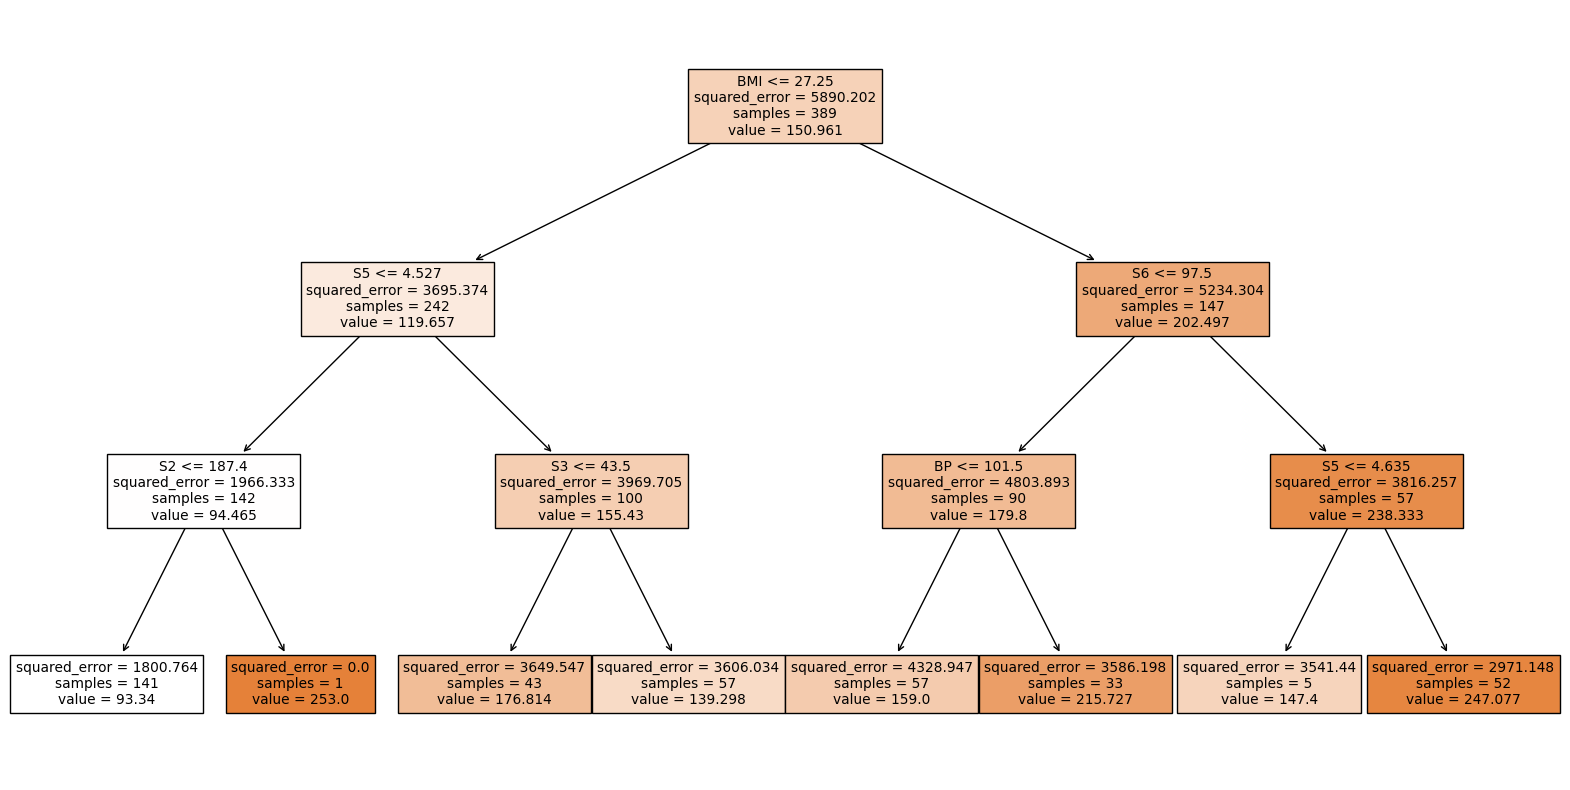

In [195]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(reg,
     feature_names=x.columns, 
     filled=True)

用fit過後的模型reg，以決策樹的問題，最後的平均值，去預測x_test

In [196]:
reg.predict(x_test)

array([215.72727273, 215.72727273, 247.07692308, 176.81395349,
        93.34042553, 139.29824561, 176.81395349,  93.34042553,
        93.34042553,  93.34042553, 139.29824561,  93.34042553,
       176.81395349, 215.72727273, 176.81395349, 215.72727273,
       215.72727273, 247.07692308, 247.07692308, 176.81395349,
        93.34042553, 176.81395349,  93.34042553,  93.34042553,
       176.81395349, 159.        , 176.81395349, 247.07692308,
       247.07692308, 139.29824561, 147.4       ,  93.34042553,
        93.34042553,  93.34042553, 176.81395349, 159.        ,
       139.29824561, 247.07692308,  93.34042553,  93.34042553,
        93.34042553,  93.34042553, 176.81395349, 247.07692308,
        93.34042553, 176.81395349, 159.        ,  93.34042553,
       176.81395349,  93.34042553, 215.72727273, 159.        ,
        93.34042553])

迴歸的信心程度 平均都是6
4-6-8 分布窄，信心高
0-6-12 分布寬，信心低


*   每個點和平均距離多遠
*   MSE 與mean的error 的square 每個點加總再平均



回歸樹根分類樹一樣, 目的: 讓你在回答問題的時候更有信心

1. 分類樹: 選擇一個分支, 讓你的Gini(猜錯機率)越小越好
2. 回歸樹: 選擇一個分支, 讓你的MSE(猜錯機率)(數值分布範圍)越小越好

MSE(每個點和平均的距離平均) = $ \frac{1}{n} \sum (p_i - \mu)^2 $

<Axes: >

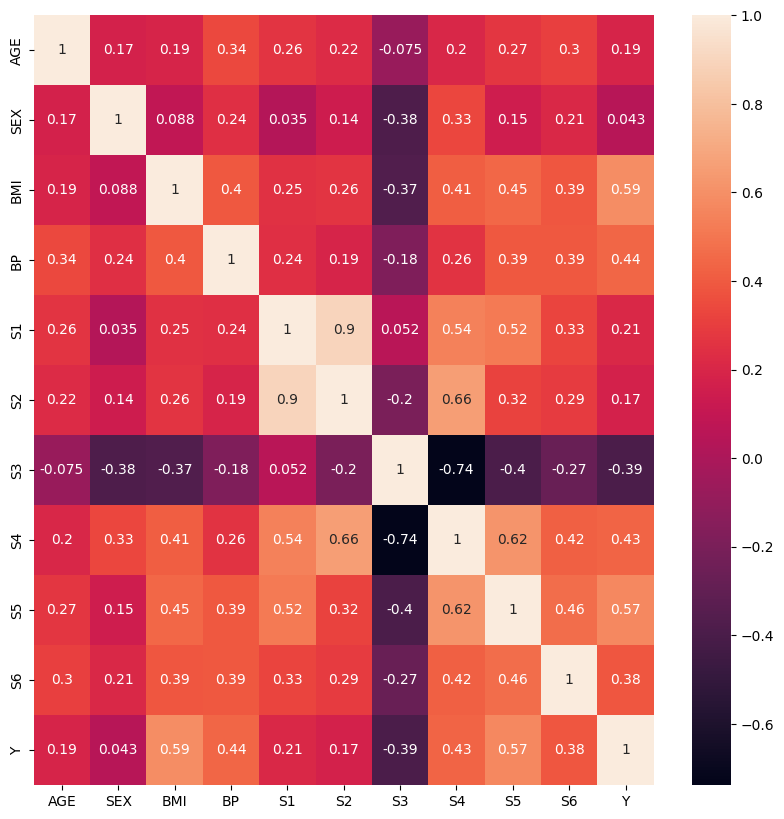

In [197]:
import seaborn as sns       #資料視覺化:個基於 matplotlib 庫的高階 API。還有豐富的視覺化庫，包括一些複雜型別，如時間序列、聯合分佈圖(jointplots)和小提琴圖(violin diagrams)。
plt.figure(figsize=(10, 10))
correlation= df.corr()
sns.heatmap(correlation,annot=True)

Coefficient of determination 決定係數
https://zh.wikipedia.org/zh-tw/%E5%86%B3%E5%AE%9A%E7%B3%BB%E6%95%B0

r^2 score (統一衡量標準)

$ a(認真猜) = \frac{1}{n} \sum (pre_i - true_i) ^ 2 $

$ b(瞎猜真實值平均) = \frac{1}{n} \sum (\mu - true_i) ^ 2 $

$ r^2 score = 1 - \frac{a}{b} $

0: 你跟瞎猜同等級
1: 你猜的完美準

In [198]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.4899678913851041